In [1]:
import math
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [2]:
# tuples are of order (e_b, a_p) binary eccentricity and planetary semi-major axis

tup_num = 5
e_bin = np.linspace(0, 0.7, tup_num)
a_plan = np.linspace(1, 5, tup_num)
f_plan = np.random.rand(2)*2*np.pi
f_bin = np.random.rand()*2*np.pi
tup_list = []

for e in e_bin:
    for a in a_plan:
        tup_list.append((e,a))
        
def survival(initial):    
    sim3 = rb.Simulation()
    
    N_orbit = (10e4)*2*np.pi
    sim3.add(m=1, hash="Binary 1")
    sim3.add(m=1, a=1, e= initial[0], hash="Binary 2", f=f_bin)
    sim3.add(a= initial[1], e=0, hash="Test Planet", f=f_bin)
    
    sim3.integrator = "whfast"
    sim3.move_to_com()
    times = np.linspace(0, N_orbit, int(1e4))
    
    for i, time in enumerate(times):
        sim3.integrate(time, exact_finish_time=0)
        p = sim3.particles[2]
        a_bin = sim3.particles[1].a
        if (p.x**2 + p.y**2) > (100*a_bin)**2:
            break
    return time

In [3]:
%%time
pool = rb.InterruptiblePool()
mapping = pool.map(func= survival, iterable= tup_list)

CPU times: user 69 ms, sys: 124 ms, total: 193 ms
Wall time: 12min 9s


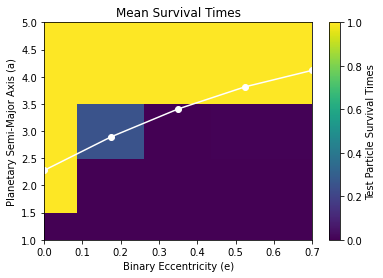

In [4]:
fig = plt.figure()
figure = np.reshape(mapping, [tup_num,tup_num])

plt.pcolormesh(e_bin,a_plan, figure.T, shading='auto')
plt.title('Mean Survival Times')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Planetary Semi-Major Axis (a)')
plt.xlim(0.0,0.7)
plt.ylim(1,5)

a_bin = 2.278 + 3.824*e_bin - 1.71*(e_bin**2)
plt.plot(e_bin, a_bin, color='white')
plt.scatter(e_bin, a_bin, color='white')

plt.colorbar(label='Test Particle Survival Times')